# Load Models

In [4]:
import tensorflow as tf
import os

# Directory where models are saved
models_directory = 'trained_models'

# Get list of model directories or files in the 'trained_models' folder
model_paths = [os.path.join(models_directory, model_name) for model_name in os.listdir(models_directory)]

# Initialize an empty list to store the loaded models
loaded_models = []

# Load each model
for model_path in model_paths:
    # Check if the model is in SavedModel format by looking for the 'saved_model.pb' file
    if os.path.isdir(model_path) and 'saved_model.pb' in os.listdir(model_path):
        model = tf.keras.models.load_model(model_path)
        loaded_models.append(model)
    # Check if the model is in HDF5 format by looking for the '.h5' extension
    elif model_path.endswith('.h5'):
        model = tf.keras.models.load_model(model_path)
        loaded_models.append(model)

print(f"Loaded {len(loaded_models)} models from '{models_directory}' directory.")

Loaded 5 models from 'trained_models' directory.


# Load Images

In [5]:
import os
import random
import numpy as np
import tensorflow as tf

def load_random_images_from_each_class(base_dir, image_size=(128, 128), num_samples=30):
    class_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
    selected_images = []
    selected_labels = []
    label_to_idx = {label: idx for idx, label in enumerate(class_folders)}
    
    for label in class_folders:
        image_files = [f for f in os.listdir(os.path.join(base_dir, label)) if f.endswith(('.png', '.jpg', '.jpeg'))]
        sampled_image_files = random.sample(image_files, num_samples)
        
        for image_file in sampled_image_files:
            image_path = os.path.join(base_dir, label, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image_array = tf.keras.preprocessing.image.img_to_array(image)
            selected_images.append(image_array)
            selected_labels.append(label_to_idx[label])
    
    return np.array(selected_images), np.array(selected_labels)

test_images, test_labels = load_random_images_from_each_class('./data_sorted/testing')

# Make Predictions

In [15]:
# List to store arrays of predictions (the softmax output) for each model
all_predictions = []

for model in loaded_models:
    # Predict to get raw scores
    predictions = model.predict(test_images)
    
    # Append the array of softmax scores to all_predictions
    all_predictions.append(predictions)


5/5 [==============================] - 1s 108ms/step


# Model Analysis

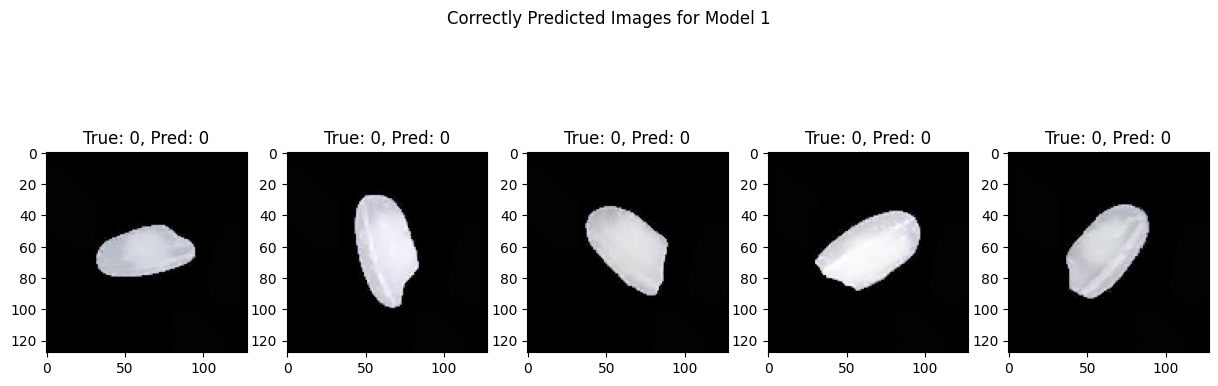

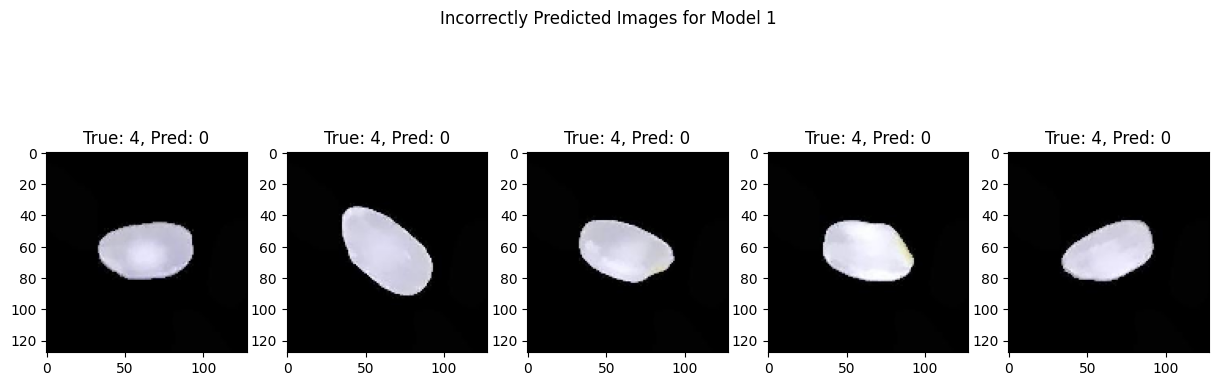

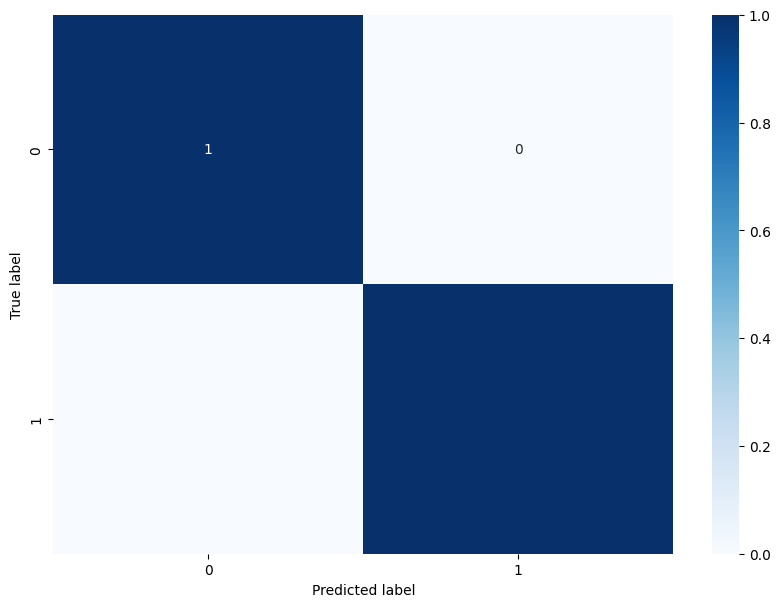

Classification report for Model 1
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      0.70      0.82        30

    accuracy                           0.94       150
   macro avg       0.95      0.94      0.94       150
weighted avg       0.95      0.94      0.94       150



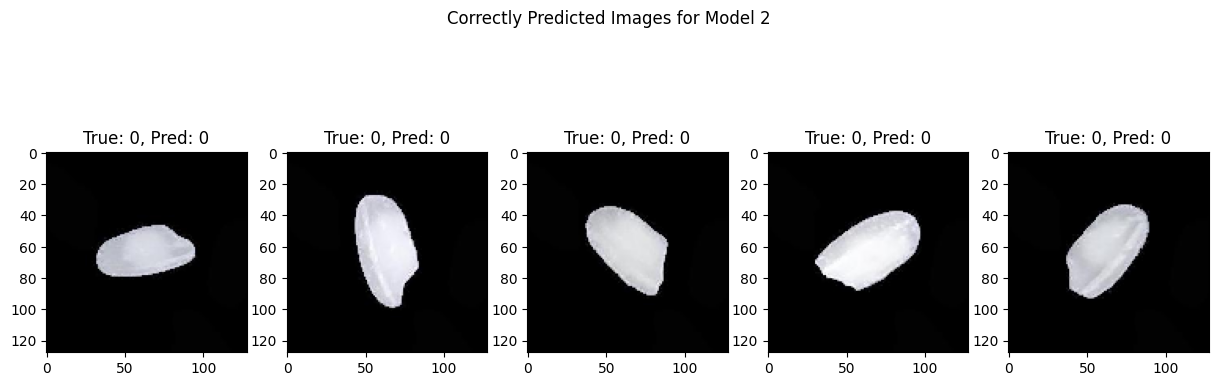

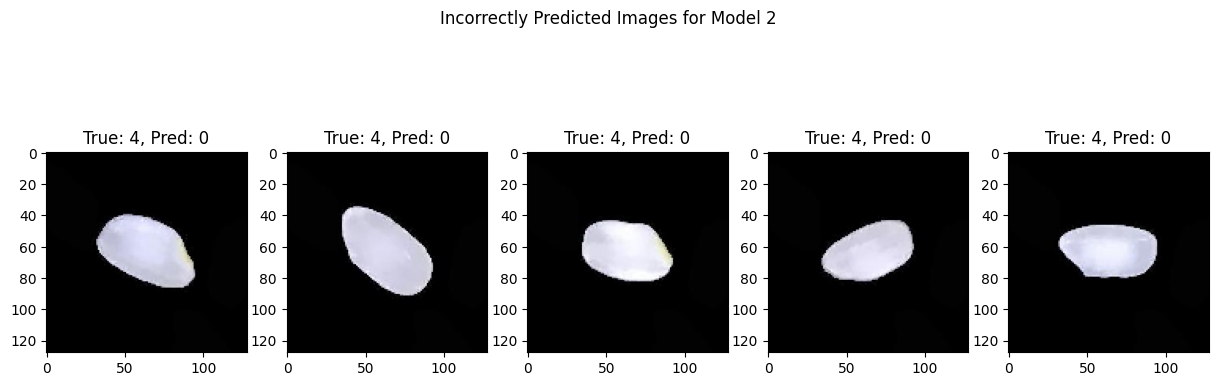

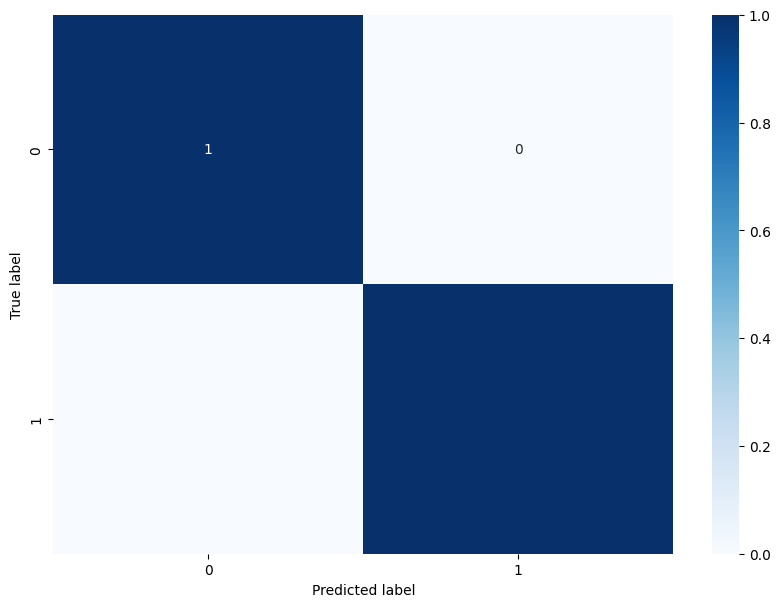

Classification report for Model 2
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      0.83      0.91        30

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



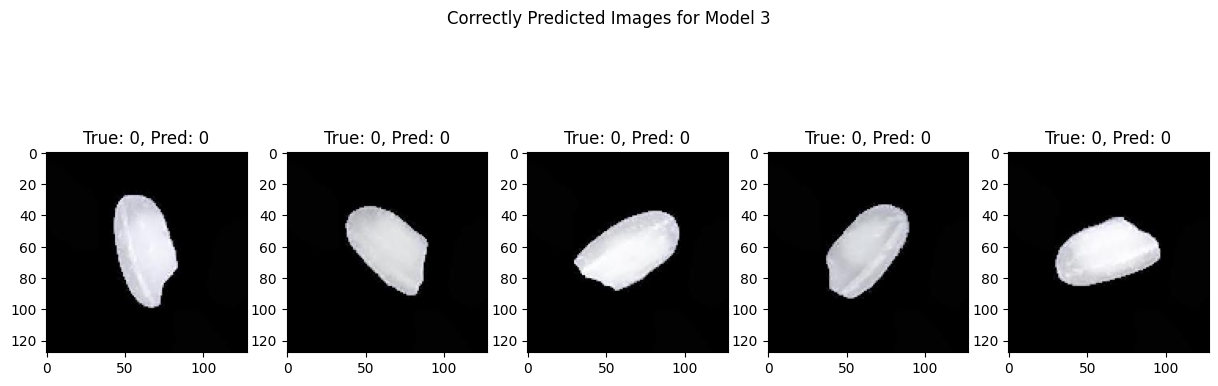

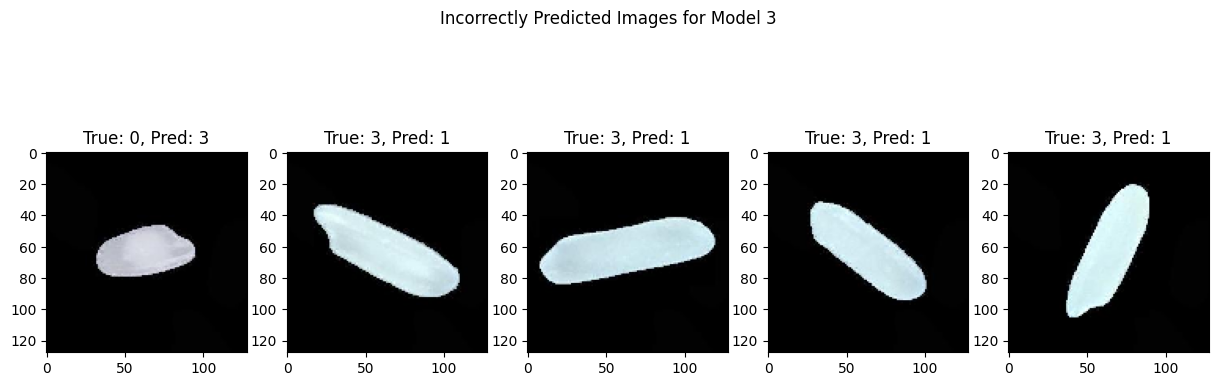

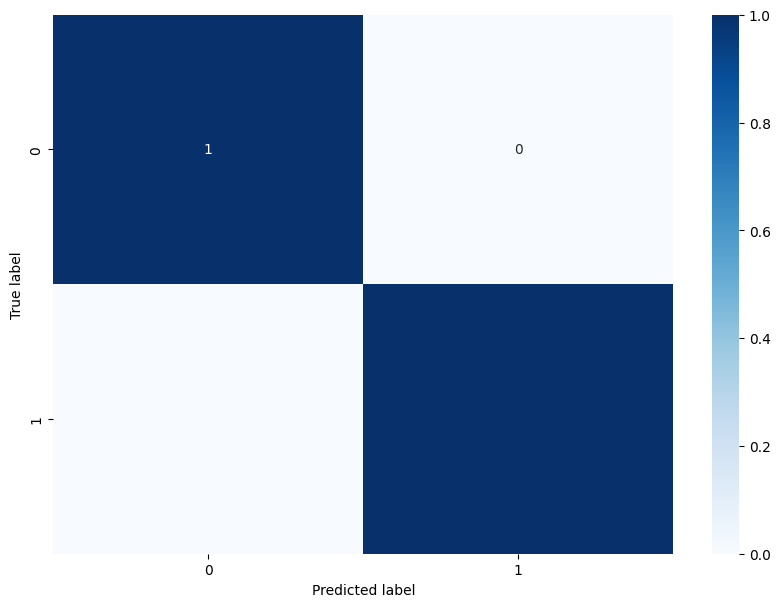

Classification report for Model 3
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.83      1.00      0.91        30
           2       1.00      1.00      1.00        30
           3       0.96      0.80      0.87        30
           4       1.00      0.93      0.97        30

    accuracy                           0.94       150
   macro avg       0.95      0.94      0.94       150
weighted avg       0.95      0.94      0.94       150



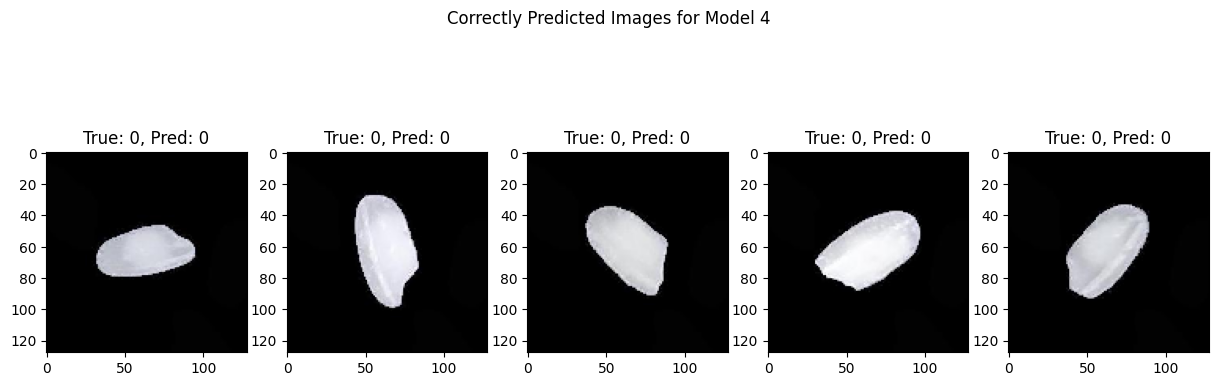

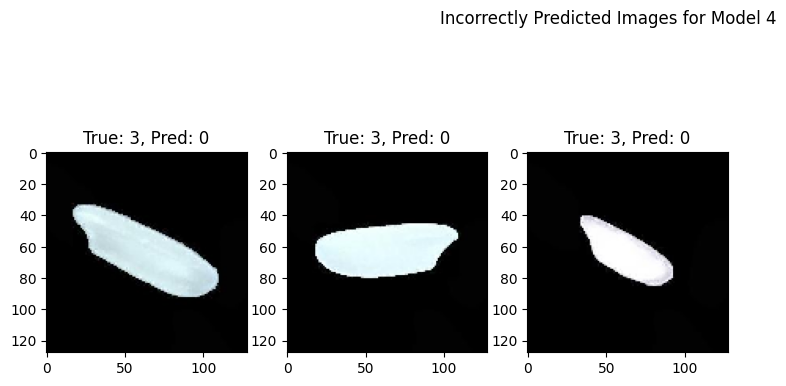

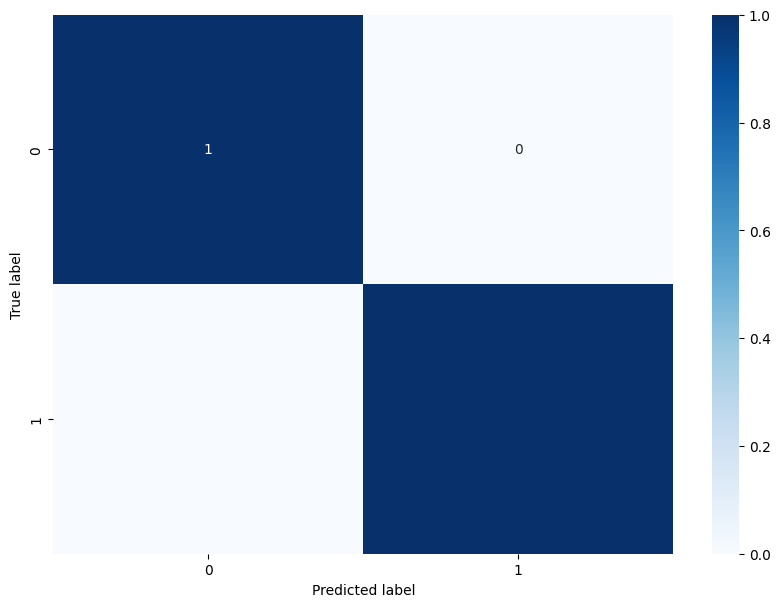

Classification report for Model 4
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      0.90      0.95        30
           4       1.00      1.00      1.00        30

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



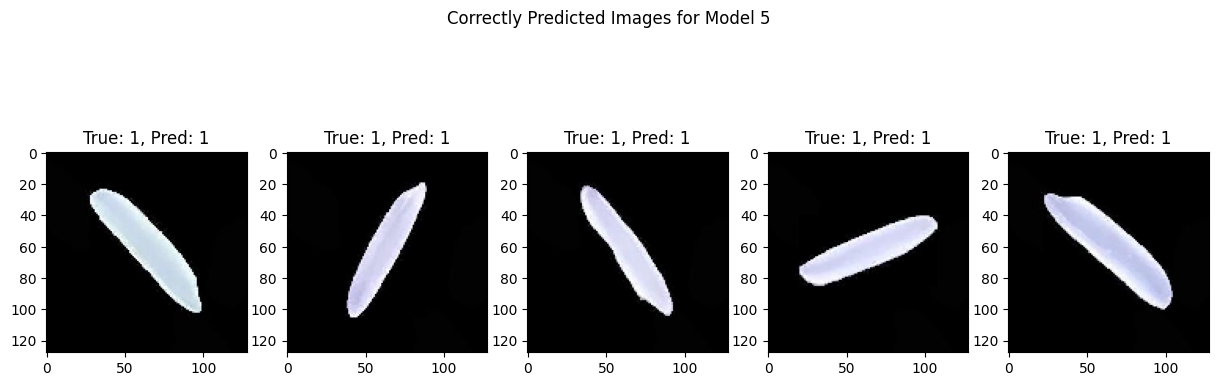

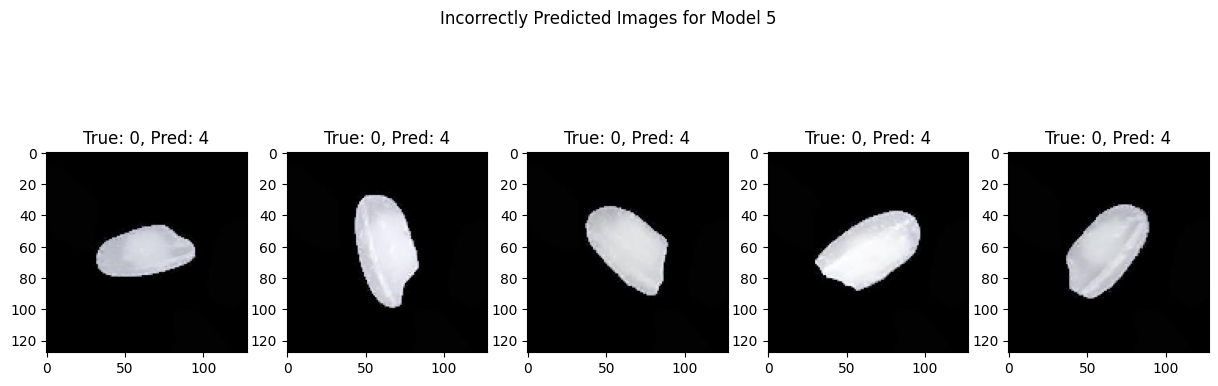

C:\Users\micha\AppData\Local\Temp\ipykernel_16108\1885248726.py:19: RuntimeWarning: invalid value encountered in divide
  confusion_mat_normalized = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
c:\Programs\Deep Learning\CSC767_Homeworks\deepenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


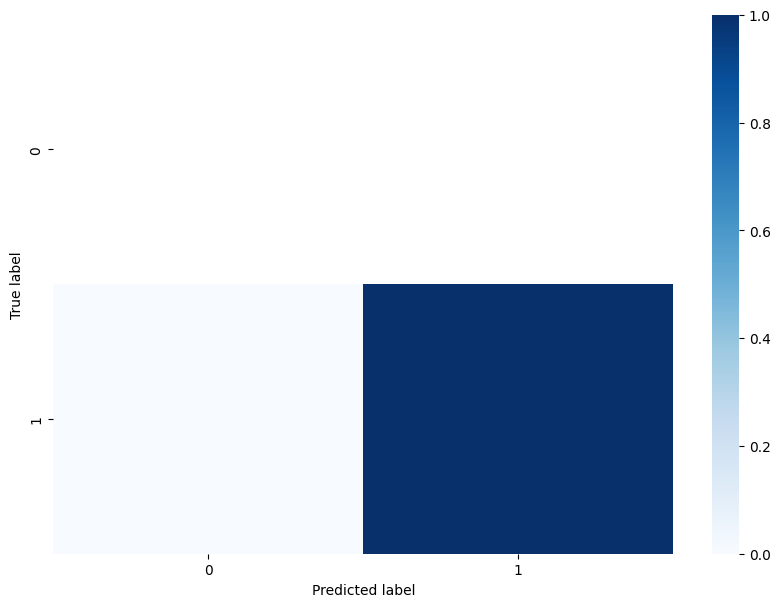

c:\Programs\Deep Learning\CSC767_Homeworks\deepenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Programs\Deep Learning\CSC767_Homeworks\deepenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Programs\Deep Learning\CSC767_Homeworks\deepenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classification report for Model 5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.35      1.00      0.52        30
           2       1.00      0.03      0.06        30
           3       1.00      0.03      0.06        30
           4       0.48      1.00      0.65        30

    accuracy                           0.41       150
   macro avg       0.57      0.41      0.26       150
weighted avg       0.57      0.41      0.26       150



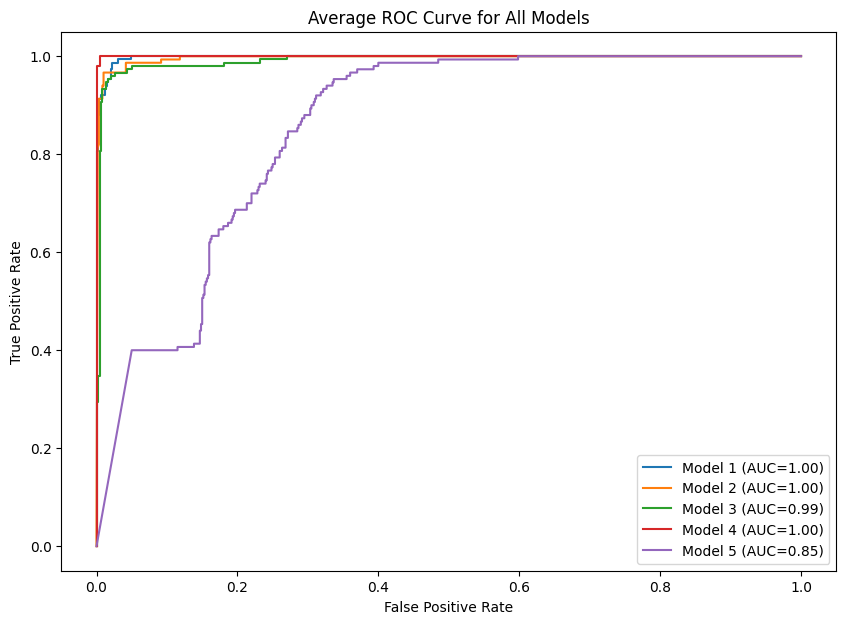

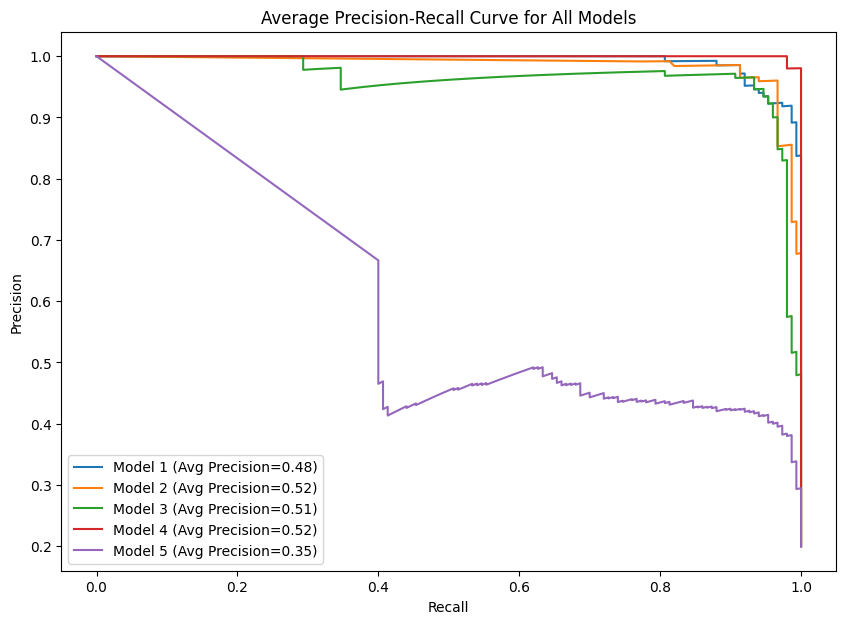

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns

def display_images(images, true_labels, pred_labels, title, max_images=5):
    """Displays the first 'max_images' images, with their true and predicted labels."""
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(range(min(max_images, len(images)))):
        plt.subplot(1, max_images, i + 1)
        plt.imshow(images[idx].astype('uint8'))
        plt.title(f"True: {true_labels[idx]}, Pred: {pred_labels[idx]}")
    plt.suptitle(title)
    plt.show()

def plot_normalized_confusion_matrix(true_labels, pred_labels):
    """Plots the normalized confusion matrix."""
    labels = list(range(len(loaded_models[0].output_shape)))
    confusion_mat = confusion_matrix(true_labels, pred_labels, labels=labels)
    confusion_mat_normalized = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_mat_normalized, annot=True, cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

from sklearn.metrics import roc_curve, auc, precision_recall_curve

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
from sklearn.preprocessing import label_binarize

def plot_multi_class_roc_and_pr_curves(true_labels, all_predictions):
    """Plots the average ROC/AUC and Precision-Recall curves for each model on the same plot."""
    number_of_models = len(all_predictions)
    number_of_classes = len(np.unique(true_labels))
    
    # Convert true labels to binary format (one-hot encoding)
    true_labels_bin = label_binarize(true_labels, classes=range(number_of_classes))

    # Plotting the ROC/AUC curves for all models:
    plt.figure(figsize=(10, 7))
    for model_index in range(number_of_models):
        predictions = all_predictions[model_index]
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(number_of_classes):
            fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(true_labels_bin.ravel(), predictions.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        plt.plot(fpr["micro"], tpr["micro"], label=f"Model {model_index + 1} (AUC={roc_auc['micro']:.2f})")
        
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Average ROC Curve for All Models")
    plt.legend(loc='best')
    plt.show()

    # Plotting the Precision-Recall curves for all models:
    plt.figure(figsize=(10, 7))
    for model_index in range(number_of_models):
        predictions = all_predictions[model_index]
        
        # Compute average precision-recall score
        precision = dict()
        recall = dict()
        average_precision = dict()
        for i in range(number_of_classes):
            precision[i], recall[i], _ = precision_recall_curve(true_labels_bin[:, i], predictions[:, i])
            average_precision[i] = np.average(precision[i])

        # Compute micro-average precision-recall curve
        precision["micro"], recall["micro"], _ = precision_recall_curve(true_labels_bin.ravel(), predictions.ravel())
        average_precision["micro"] = np.average(precision["micro"])

        plt.plot(recall["micro"], precision["micro"], label=f"Model {model_index + 1} (Avg Precision={average_precision['micro']:.2f})")
        
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Average Precision-Recall Curve for All Models")
    plt.legend(loc='best')
    plt.show()


for model_index, predictions in enumerate(all_predictions):
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Display images for each model:
    correctly_predicted_idx = np.where(test_labels == predicted_classes)[0]
    incorrectly_predicted_idx = np.where(test_labels != predicted_classes)[0]
    
    display_images(test_images[correctly_predicted_idx], test_labels[correctly_predicted_idx], predicted_classes[correctly_predicted_idx], f"Correctly Predicted Images for Model {model_index+1}")
    display_images(test_images[incorrectly_predicted_idx], test_labels[incorrectly_predicted_idx], predicted_classes[incorrectly_predicted_idx], f"Incorrectly Predicted Images for Model {model_index+1}")

    # Evaluate Test Results for each model:
    plot_normalized_confusion_matrix(test_labels, predicted_classes)
    print(f"Classification report for Model {model_index+1}")
    print(classification_report(test_labels, predicted_classes))

# Plot ROC and PR curves using predictions from all models:
plot_multi_class_roc_and_pr_curves(test_labels, all_predictions)

# Ensembles

In [10]:
# Implemented with softmax

ensemble_134_predictions = np.zeros_like(loaded_models[0].predict(test_images))

# Get predictions from models 1, 3, and 4 and average them
for model_idx in [1, 3, 4]:
    ensemble_134_predictions += loaded_models[model_idx].predict(test_images)

ensemble_134_predictions /= 3
ensemble_134_predicted_classes = np.argmax(ensemble_134_predictions, axis=1)

ensemble_024_predictions = np.zeros_like(loaded_models[0].predict(test_images))

# Get predictions from models 0, 2, and 4 and average them
for model_idx in [0, 2, 4]:
    ensemble_024_predictions += loaded_models[model_idx].predict(test_images)

ensemble_024_predictions /= 3
ensemble_024_predicted_classes = np.argmax(ensemble_024_predictions, axis=1)

5/5 [==============================] - 1s 104ms/step


In [11]:
# Classification Report for the Ensemble 1-3-4
print("Ensemble 1-3-4 Model Performance:")
print(classification_report(test_labels, ensemble_134_predicted_classes))

# Classification Report for the Ensemble 0-2-4
print("Ensemble 0-2-4 Model Performance:")
print(classification_report(test_labels, ensemble_024_predicted_classes))


Ensemble 1-3-4 Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.91      1.00      0.95        30
           2       1.00      1.00      1.00        30
           3       1.00      0.87      0.93        30
           4       0.97      1.00      0.98        30

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.98      0.97      0.97       150

Ensemble 0-2-4 Model Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.83      1.00      0.91        30
           2       1.00      1.00      1.00        30
           3       1.00      0.80      0.89        30
           4       1.00      0.97      0.98        30

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted 